# Dataset EDA 

Questions:

The main answer this first EDA is seeking is if  the types of investments in question have some relationship to GDP, and deeper, if is there a positive correlation.



1) How is the GDP of the cities distributed? 

2) How distributed among the cities is the: Public investment and Private Investment?

3) Is there a relationship between GDP and : a) Public investment? b) Private Investment?

4) Is there a positive effect in the GDP after the investments were done? 

# Solving the questions

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


df = pd.read_csv('SPcities.csv', decimal=',', encoding='Iso-8859-1', sep=';')

# In this dataset we have years that go beyond our interest, that is 2015, so here I`m going to restrict to the interest

df = df[df.year < 2016]

df.head()

,Unnamed: 0,mun,year,exp_value,imp_value,exp_share,homicid,latroc,estupro,idh,...,pri_year,pri_mun,pri_reais,pri_dolar,mun2,pub_year,pub_mun,pub_value,checkpub,checkpri
0,0,Adamantina,2000,NaN,NaN,NaN,NaN,NaN,NaN,0.721,...,NaN,NaN,NaN,NaN,ADAMANTINA,NaN,NaN,NaN,1,0
1,1,Adamantina,2001,NaN,NaN,NaN,4.0,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,ADAMANTINA,NaN,NaN,NaN,1,0
2,2,Adamantina,2002,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,ADAMANTINA,NaN,NaN,NaN,1,0
3,3,Adamantina,2003,7509556.0,NaN,"0,027878",1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,ADAMANTINA,NaN,NaN,NaN,1,0
4,4,Adamantina,2004,6864268.0,NaN,"0,019939",4.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,ADAMANTINA,NaN,NaN,NaN,1,0


# 1) How is the GDP of the cities distributed? 

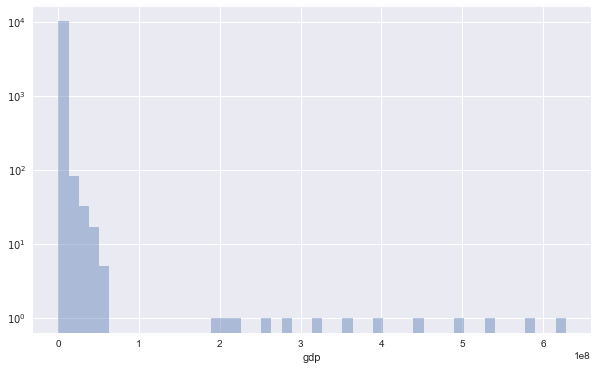

In [29]:
q1 = df

plt.figure(figsize=(10, 6))
a = sns.distplot(q1.gdp.fillna(0), kde=False)
a.set_yscale('log')

How i would expect, a very small part of the cities have medium to big GDPs,  while the most part is in the small and similar value

# 2 ) How distributed among the cities is the: Public investment and Private Investment?

-- By the value investments

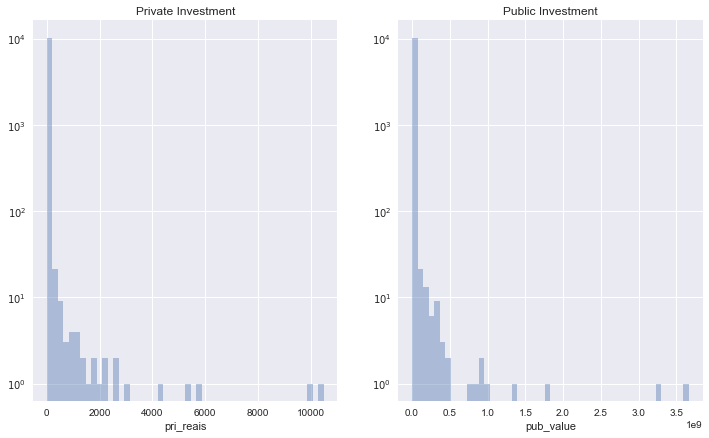

In [30]:
q2 = df

#f, axr = plt.subplot(2)

plt.figure(figsize=(12, 7))

plt.subplot(1,2,1)
a= sns.distplot(q2.pri_reais.fillna(0), kde=False)
a.set_yscale('log')
plt.title('Private Investment')

plt.subplot(1,2,2)
a= sns.distplot(q2.pub_value.fillna(0), kde=False)
a.set_yscale('log')
plt.title('Public Investment')


As we can see, the distribution shows that the most part of the investments are situated in the lower values, this is valid for both public and private investments. The pri_value is expressed in millions of Reais, this shows us that the base values for private investments are substantially higher than public investments.

-- How many times the cities receive investments during the years? 

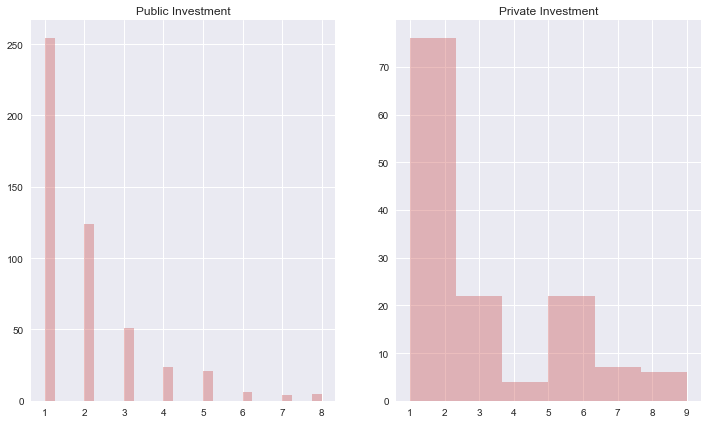

In [31]:

q31 = df[df.pub_value.notnull()]
npublic= q31.groupby('mun').size()

q32 = df[df.pri_reais.notnull()]
nprivate= q32.groupby('mun').size()

plt.figure(figsize=(12, 7))

plt.subplot(1,2,1)
            
c= sns.distplot(npublic, kde=False, color='indianred')
#a.set_yscale('log')
plt.title('Public Investment')

plt.subplot(1,2,2)
            
c= sns.distplot(nprivate, kde=False, color='indianred')
#a.set_yscale('log')
plt.title('Private Investment')

Here we can see cleary that the number of public investments are higher for any value, but here there is a clear difference that, concerning the private investment, there is a significant part of cities that receveid from 5 to 6 times investmentes indicating that we could have  some concetrantion in this parameter.

# 3) Is there a relationship between GDP and : a) Public investment? b) Private Investment?

--- Public Investment

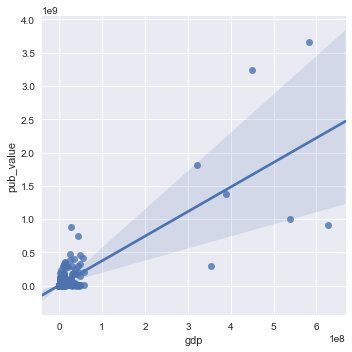

In [32]:
sns.lmplot('gdp', 'pub_value',df)

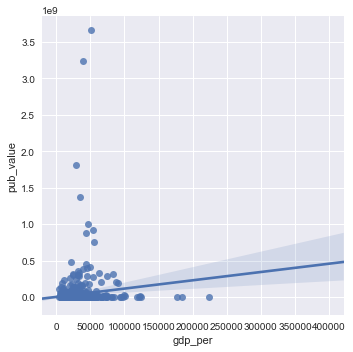

In [33]:
sns.lmplot('gdp_per', 'pub_value', df)

-- Private Investment

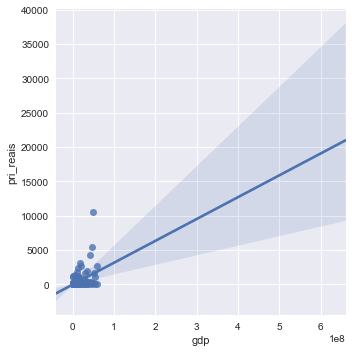

In [34]:
sns.lmplot('gdp', 'pri_reais', df)


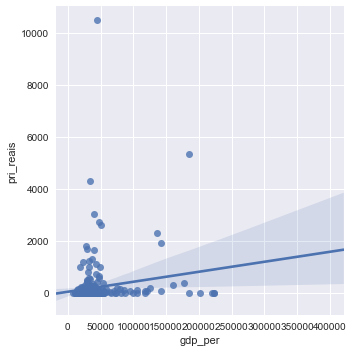

In [35]:
sns.lmplot('gdp_per', 'pri_reais', df)

Lets try another important variables to findo for some correlation : jobs (number of formal jobs), imp_value(importation values) and exp_value ( exportation values)

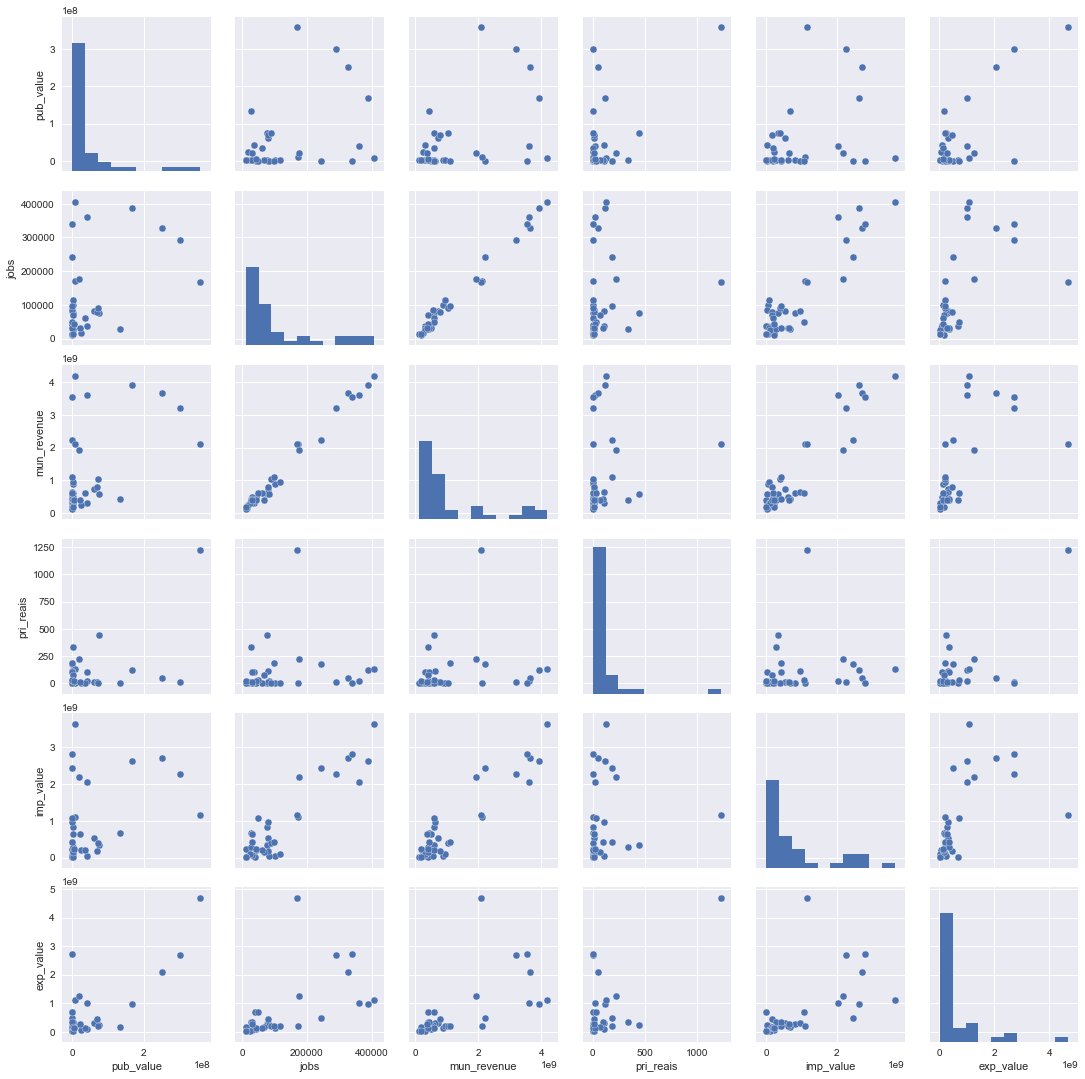

In [36]:
data = df[['pub_value', 'jobs', 'mun_revenue', 'pri_reais', 'imp_value', 'exp_value' ]].dropna()

sns.pairplot(data)
          

As we can see, visually there is little effect on GDP bot private and public investment. Otherwise we can notice that public investment seems to have some correlation with exportation values.

# 4) Is there a positive effect in the GDP after the investments were done?

-- Public Investment

F:\Anaconda2\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


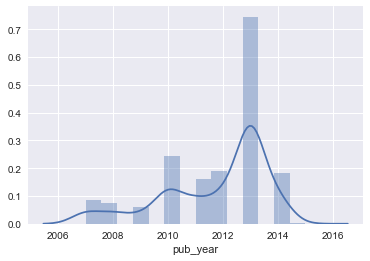

In [37]:
q4 = df[df.pub_value.notnull()]

# to understand if there was a difference lets first see if there is a year where this investments are concetrated
# so we can vizualize if there is any change

sns.distplot(q4.pub_year)

We can see that in 2013 we have a big concentration, so this should be our indicator 

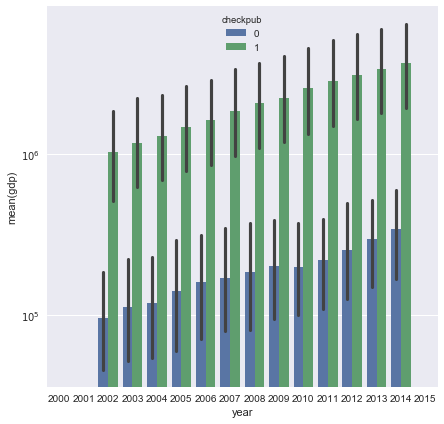

In [42]:
f = df

plt.figure(figsize=(7, 7))


x = sns.barplot('year', 'gdp', data=f, hue='checkpub')
x.set_yscale('log')

#checkpub marks the cities that received public investment in any year 


We can see cleary that the cities that receveid public investment in any time had better values for GDP in all years, even before the investments starts

-- Private Investment

F:\Anaconda2\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


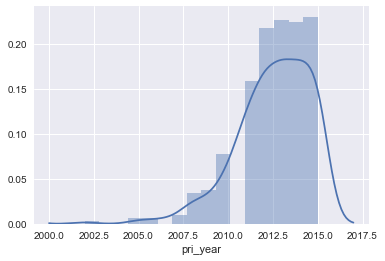

In [43]:
q42 = df[df.pri_reais.notnull()]

# to understand if there was a difference lets first see if there is a year where this investments are concetrated
# so we can vizualize if there is any change

sns.distplot(q42.pri_year)

Here we can see a different story since the concentration is located in 2012 and beyond

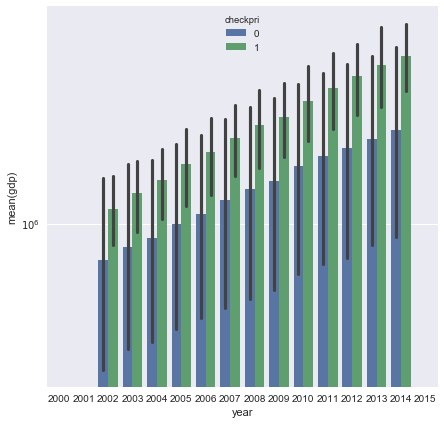

In [44]:
g = df

plt.figure(figsize=(7, 7))


x = sns.barplot('year', 'gdp', data=g, hue='checkpri')
x.set_yscale('log')

#checkpri marks the cities that received private investment in any year 

Here we can see that the cities that received investment in some point have higher standards for GDP but this is true even before the investments. But we can`t see cleary that in the year of more conctration in investments (2012 and beyond) we have a bigger difference in cities that received private investments.

# Conclusions

For this first EDA we can conclude that the investments are very concentrated in small number of cities. Another interesting point is that the cities that received investments in some point already had a bigger GDP than another cities that did`nt. 

Visually, from the correlation plots we could`n see a cleary correlation between GDP and investments (private or public)